
8 Write a program to implement a simple form of a recurrent neural network.
E.g. (4-to-l RNN) to show that the quantity of rain on a certain day
also depends on the values of the previous day



Day 1 | Day 2 | Day 3 | Day 4 → Predict Day 5 Rainfall


X shape: (196, 4, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


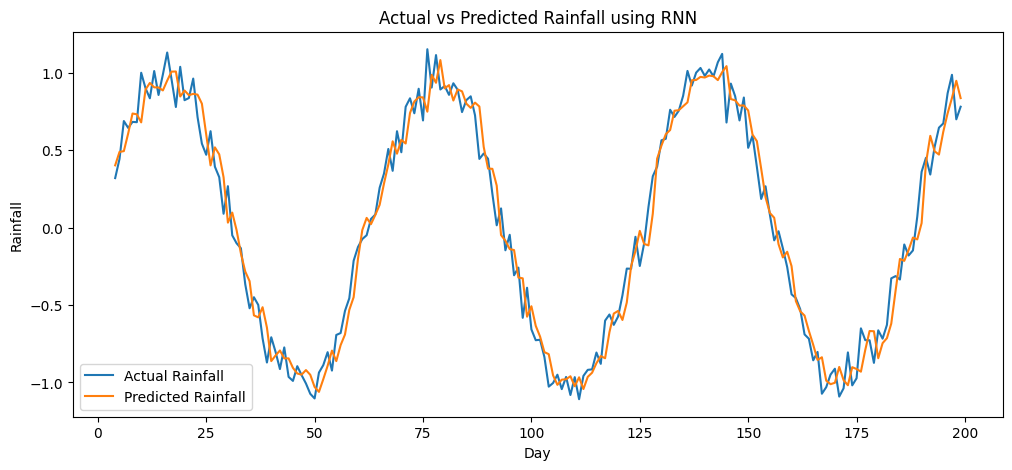

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Generate synthetic rainfall data
# Let's simulate a repeating pattern with noise
days = 200
rainfall = np.sin(np.linspace(0, 20, days)) + np.random.normal(0, 0.1, days)
rainfall = rainfall.reshape(-1, 1)

# 2. Create sequences of 4 days to predict the 5th day (4-to-1 mapping)
X = []
y = []

for i in range(len(rainfall) - 4):
    X.append(rainfall[i:i+4])
    y.append(rainfall[i+4])

X = np.array(X)
y = np.array(y)

# Reshape X to fit RNN input: [samples, time_steps, features]
print("X shape:", X.shape)  # should be (samples, 4, 1)

# 3. Build a simple RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(16, activation='tanh', input_shape=(4, 1)),
    tf.keras.layers.Dense(1)
])

# 4. Compile the model
model.compile(optimizer='adam', loss='mse')

# 5. Train the model
history = model.fit(X, y, epochs=100, verbose=0)

# 6. Predict and visualize
predicted = model.predict(X)

plt.figure(figsize=(12, 5))
plt.plot(range(4, len(rainfall)), y, label='Actual Rainfall')
plt.plot(range(4, len(rainfall)), predicted.flatten(), label='Predicted Rainfall')
plt.legend()
plt.title("Actual vs Predicted Rainfall using RNN")
plt.xlabel("Day")
plt.ylabel("Rainfall")
plt.show()
